100%|██████████| 791918971/791918971 [00:39<00:00, 20283937.40it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:01<00:00, 9756697.76it/s] 


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


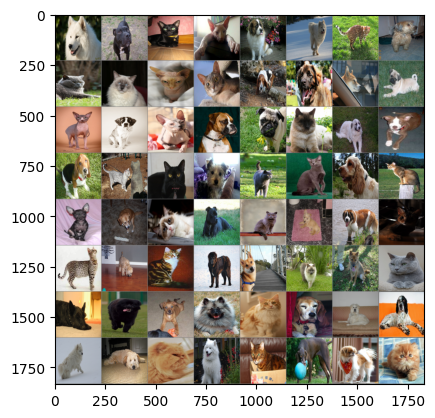

samoyed staffordshire_bull_terrier bombay sphynx saint_bernard samoyed bengal wheaten_terrier british_shorthair ragdoll sphynx Abyssinian basset_hound leonberger shiba_inu pug   sphynx saint_bernard sphynx boxer pug   siamese great_pyrenees american_pit_bull_terrier basset_hound egyptian_mau bombay yorkshire_terrier british_shorthair russian_blue english_cocker_spaniel Abyssinian chihuahua beagle ragdoll staffordshire_bull_terrier british_shorthair scottish_terrier saint_bernard Abyssinian egyptian_mau wheaten_terrier maine_coon newfoundland shiba_inu birman shiba_inu russian_blue scottish_terrier newfoundland american_pit_bull_terrier keeshond maine_coon beagle great_pyrenees english_setter samoyed wheaten_terrier persian samoyed bengal german_shorthaired japanese_chin persian
False
cpu
False
cpu
Got 100 / 3669 with accuracy 2.73


In [1]:
# Import Datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import ssl
import multiprocessing as mp 
from multiprocessing import freeze_support 
from torch.utils.data import random_split

# Define the transforms for the data
transform = transforms.Compose(
    [transforms.Resize((227,227)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64

ssl._create_default_https_context = ssl._create_unverified_context

# Define the  datasets
trainset = torchvision.datasets.OxfordIIITPet(root="./data", split = "trainval", 
                                              download=True, transform=transform)
testset = torchvision.datasets.OxfordIIITPet(root="./data", split = "test",
                                              download=True, transform=transform)
validationsize = int(0.1 * len(trainset))
trainsize = len(trainset) - validationsize
trainset, validationset = random_split(trainset, [trainsize, validationsize])

# Define the dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch_size, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = (
    'Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle',
    'bengal', 'birman', 'bombay', 'boxer', 'british_shorthair', 'chihuahua', 'egyptian_mau',
    'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
    'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher', 'newfoundland',
    'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue', 'saint_bernard', 'samoyed',
    'scottish_terrier', 'shiba_inu', 'siamese', 'sphynx', 'staffordshire_bull_terrier',
    'wheaten_terrier', 'yorkshire_terrier'
)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # move channel dimension to the last dimension
    # plt.imshow(npimg)  # move channel dimension to the last dimension

    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # batch size of 64

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Define the AlexNet architecture
class AlexNet(nn.Module):
  def __init__(self):
    super(AlexNet, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels= 96, kernel_size= 11, stride=4, padding=0)
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
    self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
    self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
    self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.fc1  = nn.Linear(in_features= 9216, out_features= 4096)
    self.fc2  = nn.Linear(in_features= 4096, out_features= 4096)
    self.fc3 = nn.Linear(in_features=4096 , out_features=37)

  def forward(self,x):
    x = F.relu(self.conv1(x))
    x = self.maxpool(x)
    x = F.relu(self.conv2(x))
    x = self.maxpool(x)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = self.maxpool(x)
    x = x.reshape(x.shape[0], -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

alex_net = AlexNet()

# CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()
# Select SGD as the optimizer here.
optimizer = optim.SGD(alex_net.parameters(), lr=0.001, momentum=0.9)

print(torch.cuda.is_available()) # where cuda can be used
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # set the device

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
print(torch.cuda.is_available()) # where cuda can be used
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # set the device

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

num_correct = 0
num_samples = 0
alex_net.eval()
for (data,targets) in testloader:
    data = data.to(device=device)
    targets = targets.to(device=device)
    ## Forward Pass
    scores = alex_net(data)
    _, predictions = scores.max(1)
    num_correct += (predictions == targets).sum().item()
    num_samples += predictions.size(0)
print(
    f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}"
)